## Import e tratamento dos dados

In [101]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [102]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [103]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69907.000000,69907.000000,69907.000000,69907.000000,69907.000000,69907.000000,69907.000000,69907.000000,69907.000000,69907.000000,69907.000000,69907.000000,69907.000000
mean,49973.254452,19466.643312,1.349536,164.360622,74.196852,128.501380,96.587323,1.366558,1.226243,0.088117,0.053729,0.803467,0.500365
std,28851.687298,2467.644950,0.476827,8.207140,14.386504,144.609283,188.486810,0.679973,0.572020,0.283467,0.225483,0.397379,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25008.500000,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.000000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74883.000000,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69907 entries, 0 to 69906
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69907 non-null  int64  
 1   age          69907 non-null  int64  
 2   gender       69907 non-null  int64  
 3   height       69907 non-null  int64  
 4   weight       69907 non-null  float64
 5   ap_hi        69907 non-null  int64  
 6   ap_lo        69907 non-null  int64  
 7   cholesterol  69907 non-null  int64  
 8   gluc         69907 non-null  int64  
 9   smoke        69907 non-null  int64  
 10  alco         69907 non-null  int64  
 11  active       69907 non-null  int64  
 12  cardio       69907 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [105]:
for x in df['ap_hi'].unique():
    
    if x > 300 and len(str(x)) <= 4:
        df['ap_hi'].replace(x, int(x/10), inplace=True)
        
    if x > 300 and len(str(x)) == 5:
        df['ap_hi'].replace(x, int(x/100), inplace=True)
        
for x in df['ap_lo'].unique():
    if x > 300 and len(str(x)) == 3:
        df['ap_lo'].replace(x, int(x/10), inplace=True)
        
    if x > 300 and len(str(x)) == 4:  
        if int(x/10) > 190:
            df['ap_lo'].replace(x, int(x/100), inplace=True)
        else:
            df['ap_lo'].replace(x, int(x/10), inplace=True)
            
    if x > 300 and len(str(x)) == 5:
        df['ap_lo'].replace(x, int(x/100), inplace=True)

In [106]:
df['age'] = df['age'] / 365
df['age'] = df['age'].astype('int64')
df['gender'].replace(1, 'Masculino', inplace=True)
df['gender'].replace(2, 'Feminino', inplace=True)
df['cholesterol'].replace(1, 'Normal', inplace=True)
df['cholesterol'].replace(2, 'Acima do normal', inplace=True)
df['cholesterol'].replace(3, 'Muito acima do normal', inplace=True)
df['gluc'].replace(1, 'Normal', inplace=True)
df['gluc'].replace(2, 'Acima do normal', inplace=True)
df['gluc'].replace(3, 'Muito acima do normal', inplace=True)
df['smoke'].replace(1, 'Positivo', inplace=True)
df['smoke'].replace(0, 'Negativo', inplace=True)
df['alco'].replace(1, 'Positivo', inplace=True)
df['alco'].replace(0, 'Negativo', inplace=True)
df['active'].replace(1, 'Positivo', inplace=True)
df['active'].replace(0, 'Negativo', inplace=True)
df['cardio'].replace(1, 'Positivo', inplace=True)
df['cardio'].replace(0, 'Negativo', inplace=True)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,Feminino,168,62.0,110,80,Normal,Normal,Negativo,Negativo,Positivo,Negativo
1,1,55,Masculino,156,85.0,140,90,Muito acima do normal,Normal,Negativo,Negativo,Positivo,Positivo
2,2,51,Masculino,165,64.0,130,70,Muito acima do normal,Normal,Negativo,Negativo,Negativo,Positivo
3,3,48,Feminino,169,82.0,150,100,Normal,Normal,Negativo,Negativo,Positivo,Positivo
4,4,47,Masculino,156,56.0,100,60,Normal,Normal,Negativo,Negativo,Negativo,Negativo


## Análise dos dados para o desenvolvimento dos insights

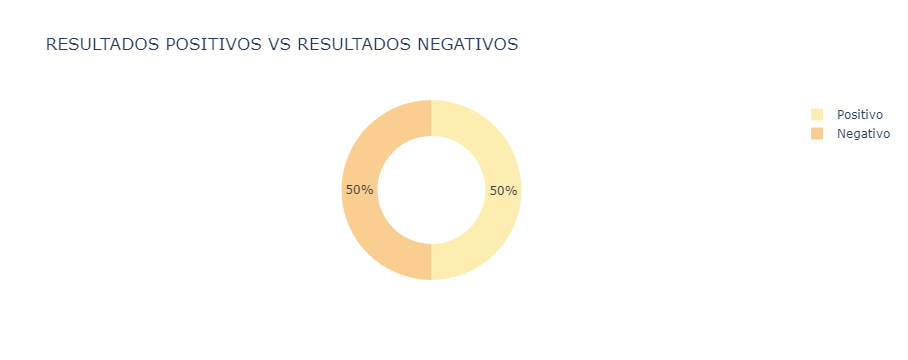

In [107]:
px.pie(names=df.cardio.value_counts().index, values=df.cardio.value_counts().values, hole=0.6, 
       color_discrete_sequence=px.colors.cmocean.matter, title='RESULTADOS POSITIVOS VS RESULTADOS NEGATIVOS')

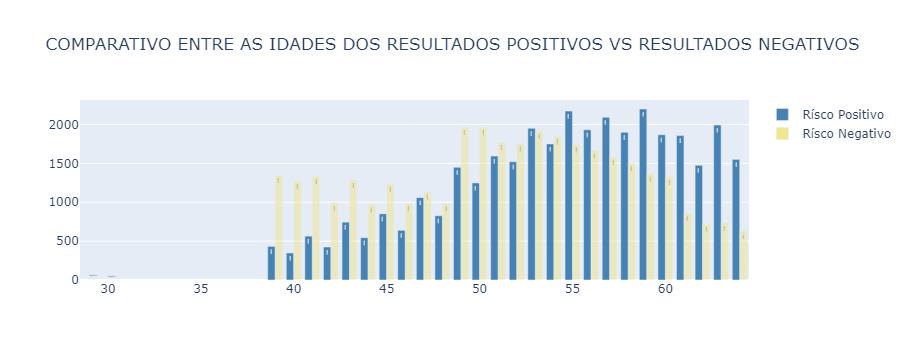

In [140]:
dados_positivos = df[df['cardio'] == 'Positivo']
dados_negativos = df[df['cardio'] == 'Negativo']

fig1 = go.Figure(layout={'title':'COMPARATIVO ENTRE AS IDADES DOS RESULTADOS POSITIVOS VS RESULTADOS NEGATIVOS'})

fig1.add_traces(go.Bar(x= dados_positivos['age'].value_counts().sort_index().index, 
                      y=dados_positivos['age'].value_counts().sort_index().values, 
                      name='Rísco Positivo', text='Positivo', marker={'color':'steelblue'}))


fig1.add_traces(go.Bar(x= dados_negativos['age'].value_counts().sort_index().index, 
                      y=dados_negativos['age'].value_counts().sort_index().values, 
                      name='Rísco Negativo', text='Negativo', marker={'color':'khaki', 'opacity':0.5}))
fig1.show()


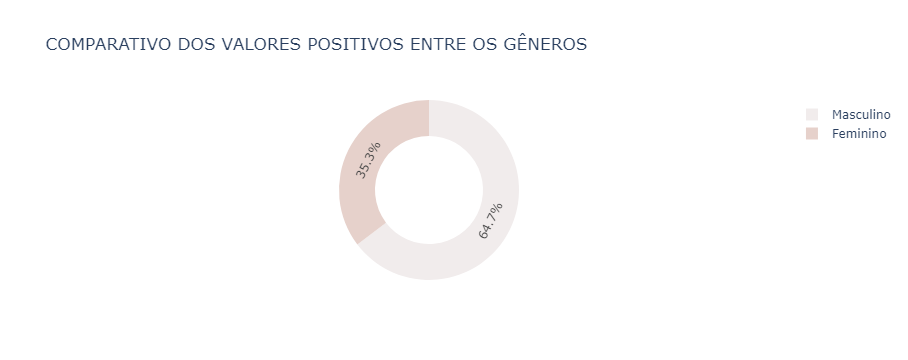

In [109]:
px.pie(names=dados_positivos.gender.value_counts().index, values=dados_positivos.gender.value_counts().values, 
       hole=0.6, color_discrete_sequence=px.colors.sequential.amp, title='COMPARATIVO DOS VALORES POSITIVOS ENTRE OS GÊNEROS')

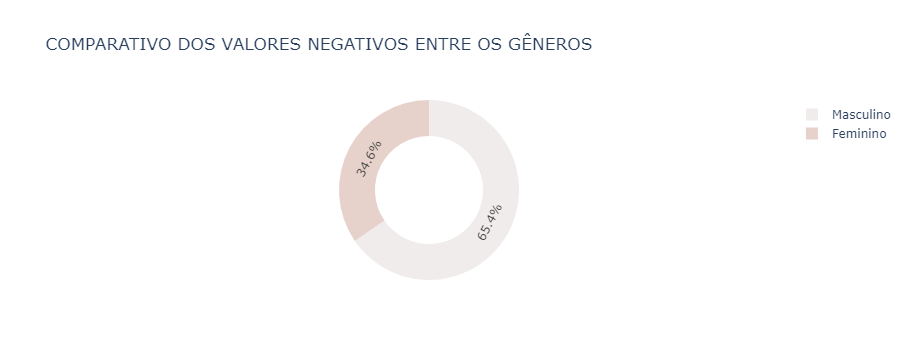

In [110]:
px.pie(names=dados_negativos.gender.value_counts().index, values=dados_negativos.gender.value_counts().values, 
       hole=0.6, color_discrete_sequence=px.colors.sequential.amp, title='COMPARATIVO DOS VALORES NEGATIVOS ENTRE OS GÊNEROS')

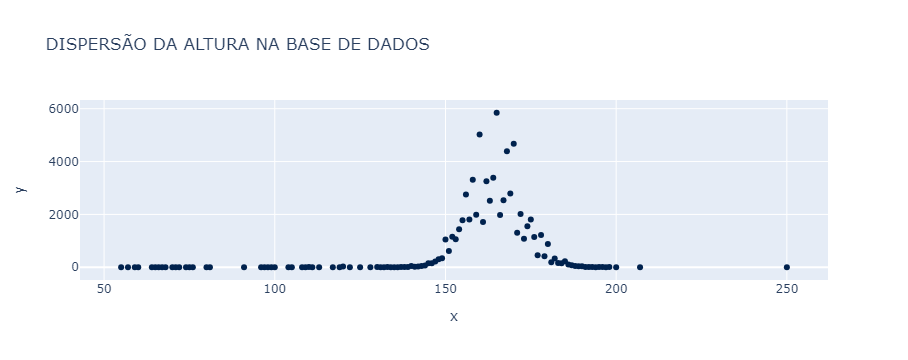

In [111]:
px.scatter(x=df.height.value_counts().sort_index(ascending=False).index, color_discrete_sequence=px.colors.sequential.Cividis,
           y=df.height.value_counts().sort_index(ascending=False).values, title='DISPERSÃO DA ALTURA NA BASE DE DADOS')

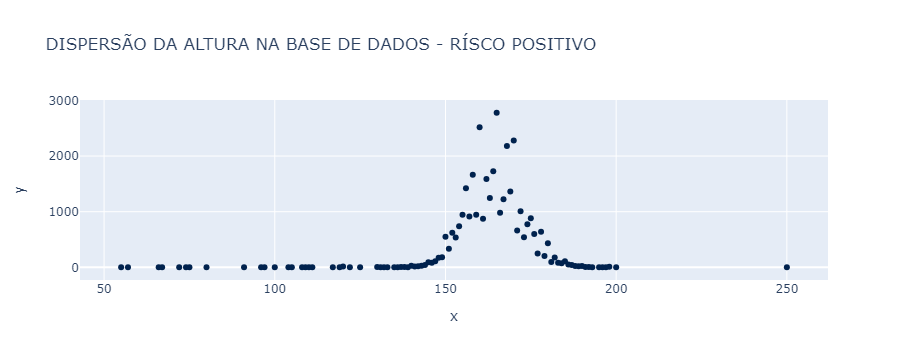

In [112]:
px.scatter(x=dados_positivos.height.value_counts().sort_index(ascending=False).index, color_discrete_sequence=px.colors.sequential.Cividis,
           y=dados_positivos.height.value_counts().sort_index(ascending=False).values, 
           title='DISPERSÃO DA ALTURA NA BASE DE DADOS - RÍSCO POSITIVO')

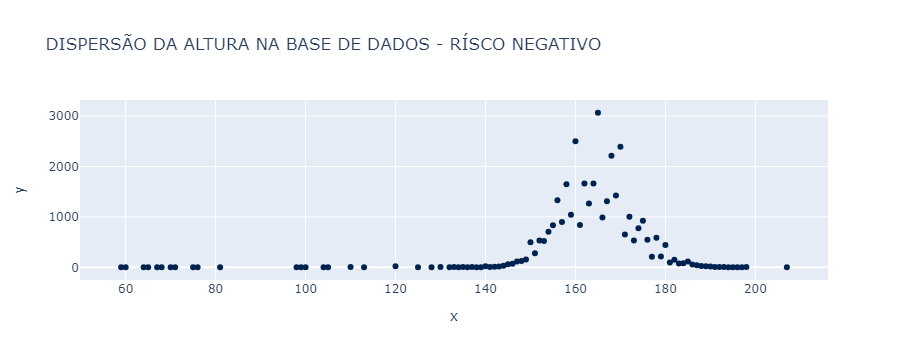

In [113]:
px.scatter(x=dados_negativos.height.value_counts().sort_index(ascending=False).index, color_discrete_sequence=px.colors.sequential.Cividis,
           y=dados_negativos.height.value_counts().sort_index(ascending=False).values, 
           title='DISPERSÃO DA ALTURA NA BASE DE DADOS - RÍSCO NEGATIVO')

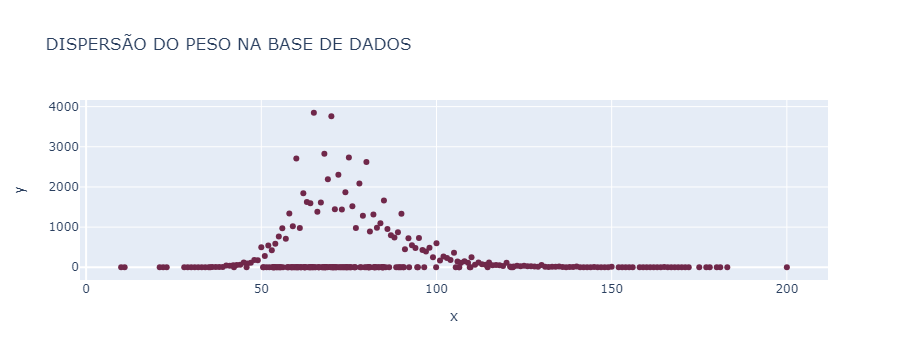

In [114]:
px.scatter(x=df.weight.value_counts().sort_index(ascending=False).index, color_discrete_sequence=px.colors.sequential.Burgyl_r,
           y=df.weight.value_counts().sort_index(ascending=False).values, title='DISPERSÃO DO PESO NA BASE DE DADOS')

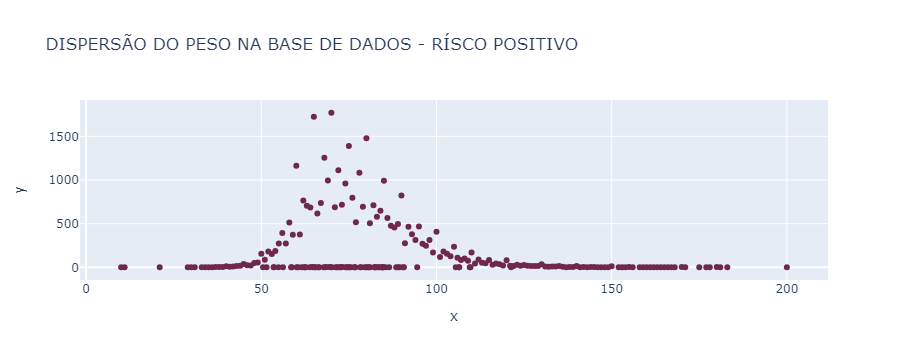

In [115]:
px.scatter(x=dados_positivos.weight.value_counts().sort_index(ascending=False).index, color_discrete_sequence=px.colors.sequential.Burgyl_r,
           y=dados_positivos.weight.value_counts().sort_index(ascending=False).values, 
           title='DISPERSÃO DO PESO NA BASE DE DADOS - RÍSCO POSITIVO')

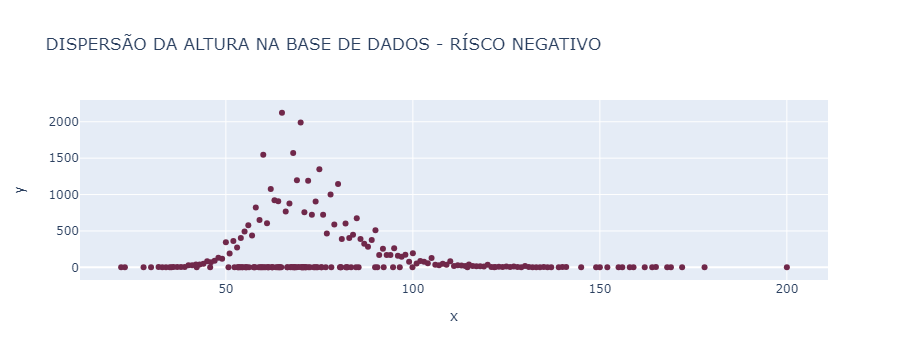

In [116]:
px.scatter(x=dados_negativos.weight.value_counts().sort_index(ascending=False).index, 
           y=dados_negativos.weight.value_counts().sort_index(ascending=False).values, 
           color_discrete_sequence=px.colors.sequential.Burgyl_r, title='DISPERSÃO DA ALTURA NA BASE DE DADOS - RÍSCO NEGATIVO')

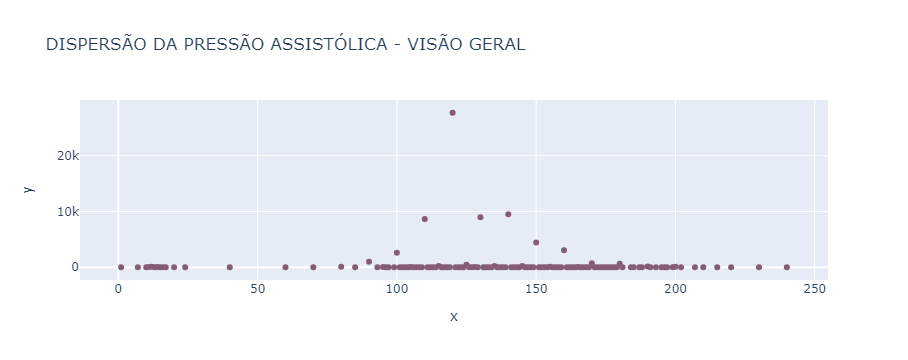

In [117]:
px.scatter(x=df.ap_hi.value_counts().sort_index().index, y=df.ap_hi.value_counts().sort_index().values,
           title='DISPERSÃO DA PRESSÃO ASSISTÓLICA - VISÃO GERAL', color_discrete_sequence=px.colors.carto.Antique)


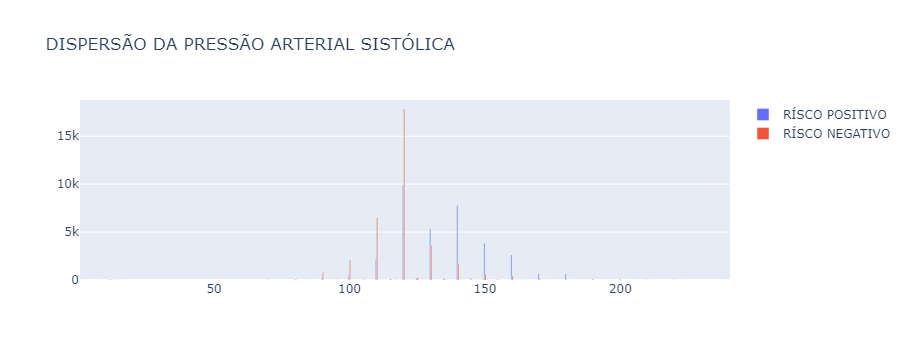

In [118]:
fig_ap_hi = go.Figure(layout={'title':'DISPERSÃO DA PRESSÃO ARTERIAL SISTÓLICA'})

fig_ap_hi.add_traces(go.Bar(x=dados_positivos.ap_hi.value_counts().sort_index().index,
                           y=dados_positivos.ap_hi.value_counts().sort_index().values, name='RÍSCO POSITIVO'))

fig_ap_hi.add_traces(go.Bar(x=dados_negativos.ap_hi.value_counts().sort_index().index,
                           y=dados_negativos.ap_hi.value_counts().sort_index().values, name='RÍSCO NEGATIVO'))
fig_ap_hi.show()

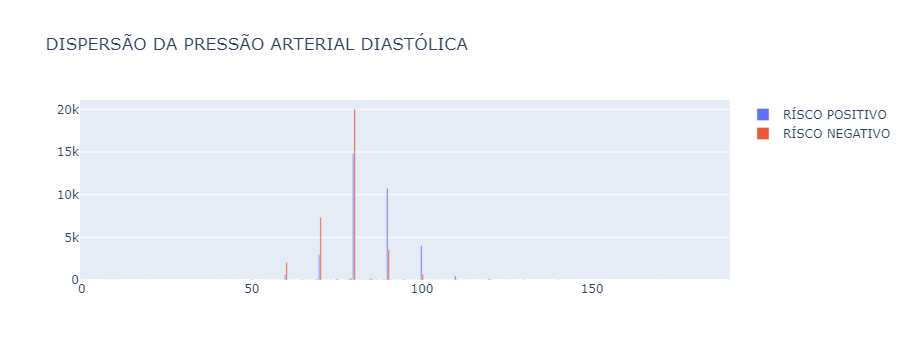

In [119]:
fig_ap_hi = go.Figure(layout={'title':'DISPERSÃO DA PRESSÃO ARTERIAL DIASTÓLICA'})

fig_ap_hi.add_traces(go.Bar(x=dados_positivos.ap_lo.value_counts().sort_index().index,
                           y=dados_positivos.ap_lo.value_counts().sort_index().values, name='RÍSCO POSITIVO'))

fig_ap_hi.add_traces(go.Bar(x=dados_negativos.ap_lo.value_counts().sort_index().index,
                           y=dados_negativos.ap_lo.value_counts().sort_index().values, name='RÍSCO NEGATIVO'))
fig_ap_hi.show()

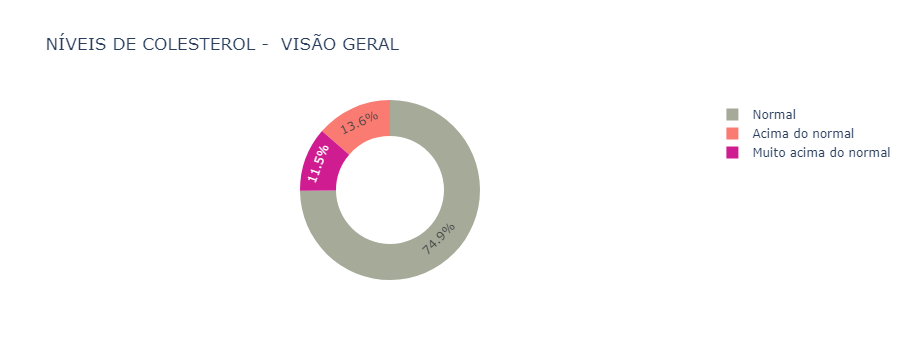

In [120]:
px.pie(names=df['cholesterol'].value_counts().index, values=df['cholesterol'].value_counts().values, 
       color=df['cholesterol'].unique(), color_discrete_sequence=px.colors.carto.Bold_r, 
        title='NÍVEIS DE COLESTEROL -  VISÃO GERAL', hole=0.6)

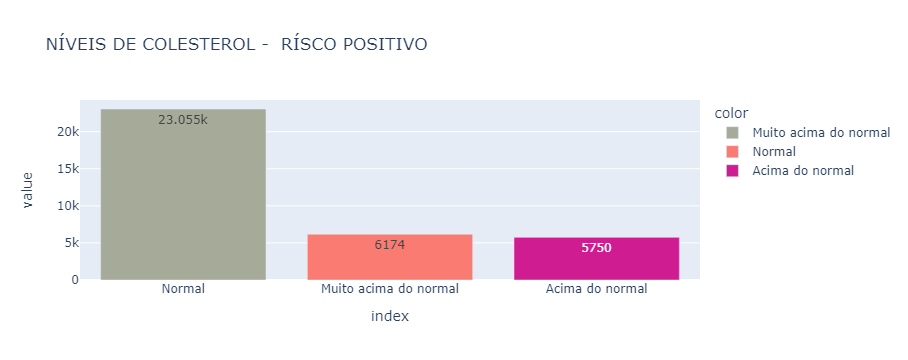

In [121]:
px.bar(dados_positivos['cholesterol'].value_counts(), color=dados_positivos['cholesterol'].unique(), color_discrete_sequence=px.colors.carto.Bold_r, 
       text_auto=True, title='NÍVEIS DE COLESTEROL -  RÍSCO POSITIVO')

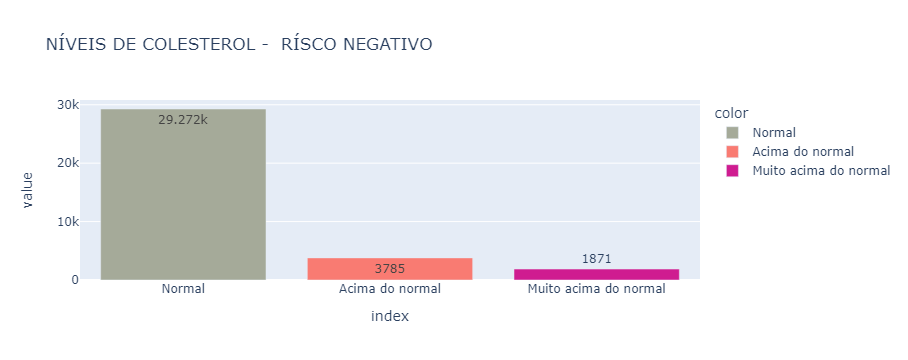

In [122]:
px.bar(dados_negativos['cholesterol'].value_counts(), color=dados_negativos['cholesterol'].unique(), color_discrete_sequence=px.colors.carto.Bold_r, 
       text_auto=True, title='NÍVEIS DE COLESTEROL -  RÍSCO NEGATIVO')

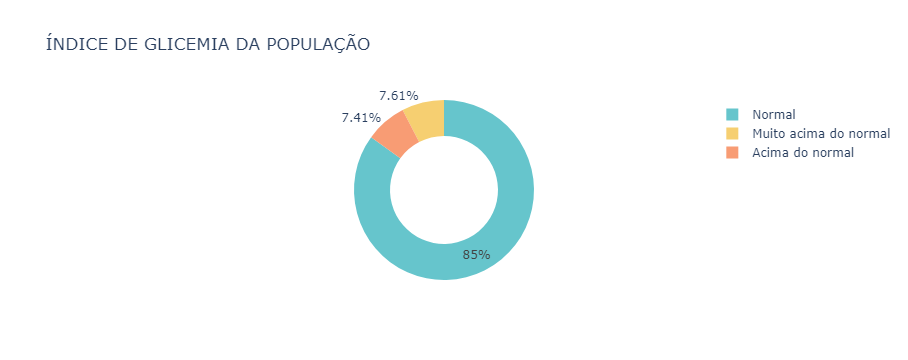

In [123]:
px.pie(names=df.gluc.value_counts().index, values=df.gluc.value_counts().values, title='ÍNDICE DE GLICEMIA DA POPULAÇÃO', 
       hole=0.6, color_discrete_sequence=px.colors.carto.Pastel)

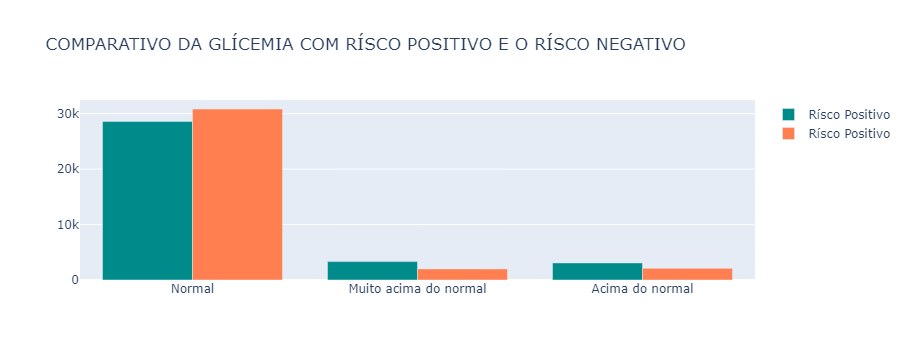

In [124]:
fig_gluc = go.Figure(layout={'title':'COMPARATIVO DA GLÍCEMIA COM RÍSCO POSITIVO E O RÍSCO NEGATIVO'})

fig_gluc.add_traces(go.Bar(x=dados_positivos.gluc.value_counts().index, y=dados_positivos.gluc.value_counts().values, 
                           name='Rísco Positivo', marker={'color':'DarkCyan'}))

fig_gluc.add_traces(go.Bar(x=dados_negativos.gluc.value_counts().index, y=dados_negativos.gluc.value_counts().values, 
                           name='Rísco Positivo', marker={'color':'Coral'}))

fig_gluc.show()

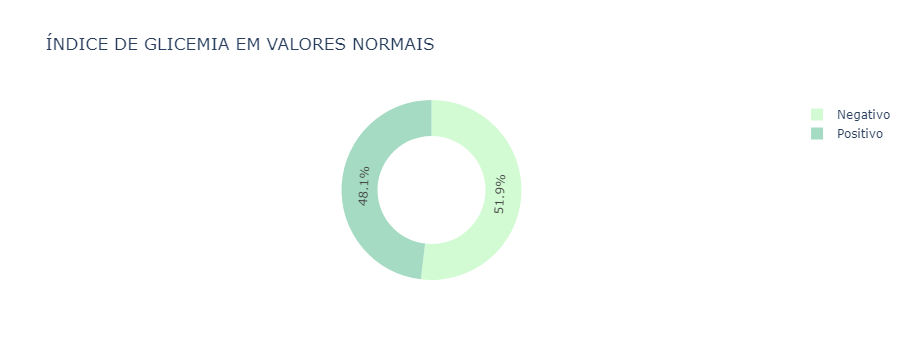

In [125]:
gluc = df.loc[df['gluc'] == 'Normal', ['cardio']]
px.pie(gluc, names=gluc.value_counts().index.values , values=gluc.value_counts().values, color_discrete_sequence=px.colors.carto.Darkmint,
       title='ÍNDICE DE GLICEMIA EM VALORES NORMAIS', hole=0.6)

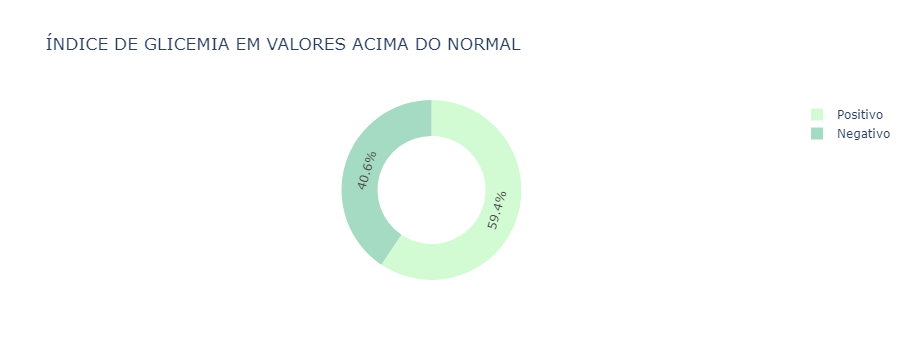

In [135]:
gluc = df.loc[df['gluc'] == 'Acima do normal', ['cardio']]
px.pie(gluc, names=gluc.value_counts().index.values , values=gluc.value_counts().values, color_discrete_sequence=px.colors.carto.Darkmint,
       title='ÍNDICE DE GLICEMIA EM VALORES ACIMA DO NORMAL', hole=0.6)

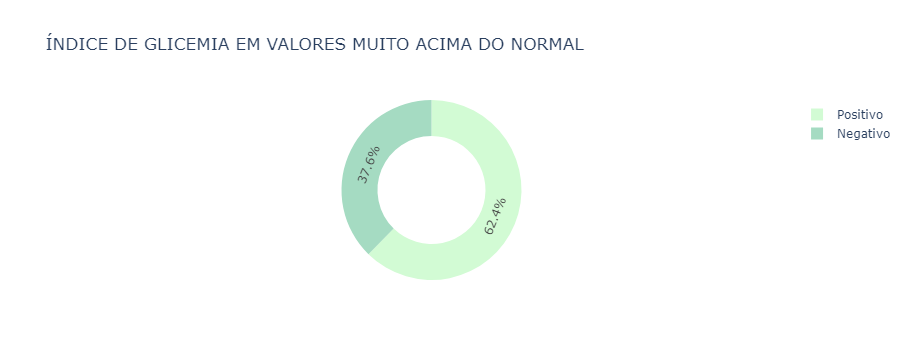

In [136]:
gluc = df.loc[df['gluc'] == 'Muito acima do normal', ['cardio']]
px.pie(gluc, names=gluc.value_counts().index.values , values=gluc.value_counts().values, color_discrete_sequence=px.colors.carto.Darkmint,
       title='ÍNDICE DE GLICEMIA EM VALORES MUITO ACIMA DO NORMAL', hole=0.6)

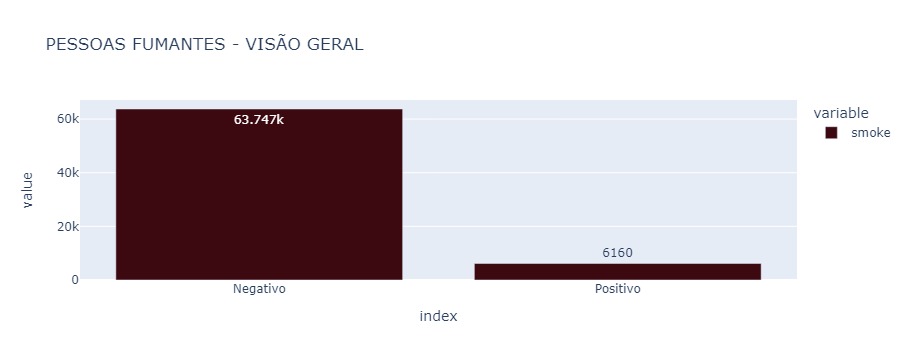

In [128]:
px.bar(df.smoke.value_counts(), color_discrete_sequence=px.colors.sequential.amp_r, text_auto=True, 
       title='PESSOAS FUMANTES - VISÃO GERAL')

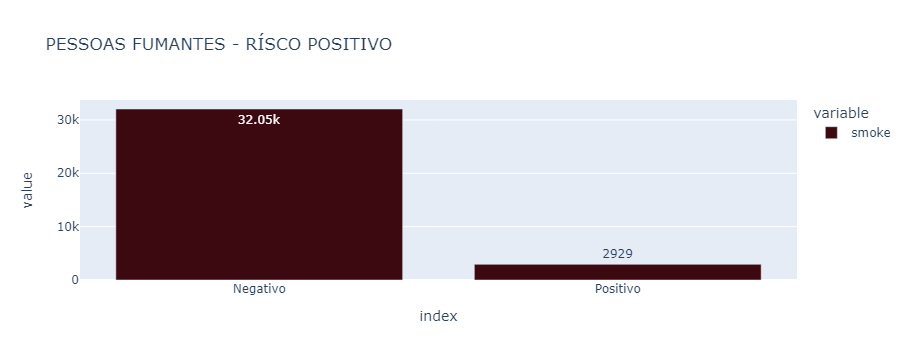

In [129]:
px.bar(dados_positivos.smoke.value_counts(), color_discrete_sequence=px.colors.sequential.amp_r, text_auto=True, 
       title='PESSOAS FUMANTES - RÍSCO POSITIVO')

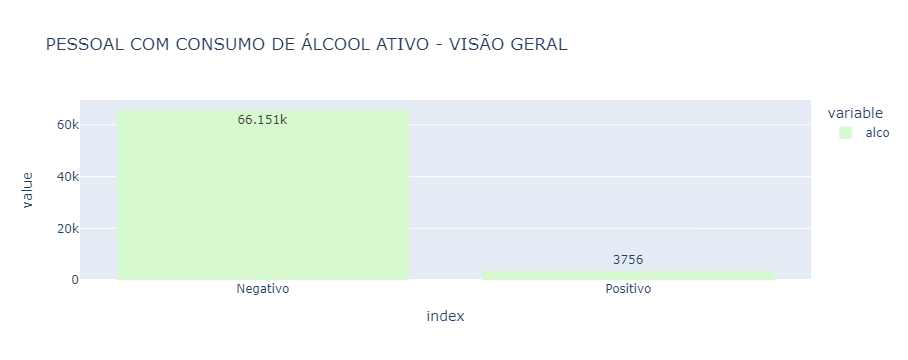

In [130]:
px.bar(df.alco.value_counts(), color_discrete_sequence=px.colors.sequential.algae, text_auto=True, 
       title='PESSOAL COM CONSUMO DE ÁLCOOL ATIVO - VISÃO GERAL')

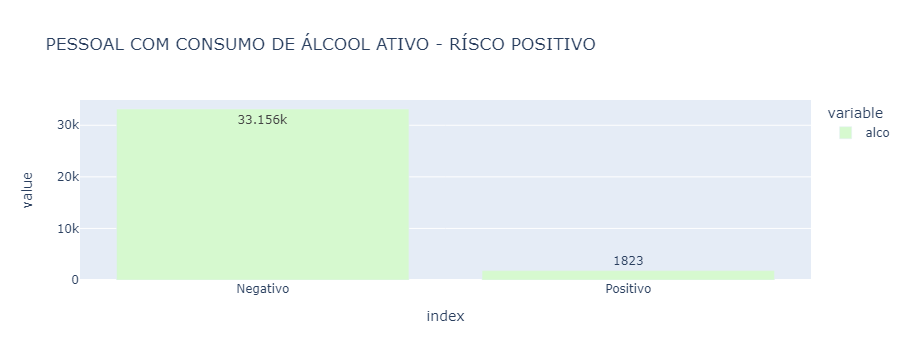

In [131]:
px.bar(dados_positivos.alco.value_counts(), color_discrete_sequence=px.colors.sequential.algae, text_auto=True, 
       title='PESSOAL COM CONSUMO DE ÁLCOOL ATIVO - RÍSCO POSITIVO')

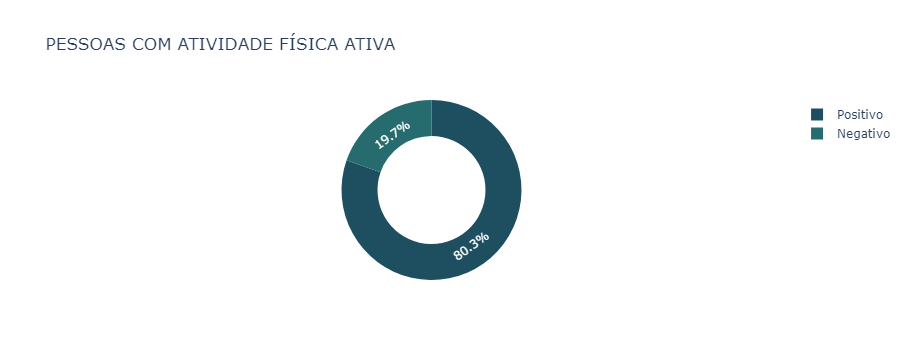

In [132]:
px.pie(names=df.active.value_counts().index, values=df.active.value_counts().values, 
       title='PESSOAS COM ATIVIDADE FÍSICA ATIVA', hole=0.6, color_discrete_sequence=px.colors.carto.Blugrn_r)

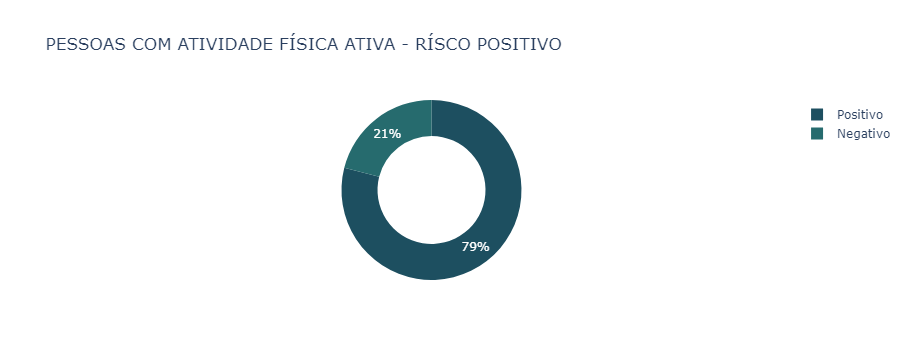

In [133]:
px.pie(names=dados_positivos.active.value_counts().index, values=dados_positivos.active.value_counts().values, 
       title='PESSOAS COM ATIVIDADE FÍSICA ATIVA - RÍSCO POSITIVO', hole=0.6, color_discrete_sequence=px.colors.carto.Blugrn_r)

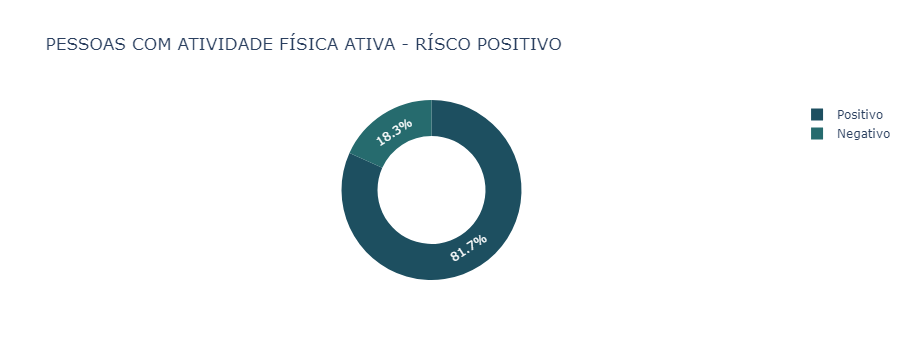

In [134]:
px.pie(names=dados_negativos.active.value_counts().index, values=dados_negativos.active.value_counts().values, 
       title='PESSOAS COM ATIVIDADE FÍSICA ATIVA - RÍSCO POSITIVO', hole=0.6, color_discrete_sequence=px.colors.carto.Blugrn_r)